In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data (used car database from the UK)
data = pd.read_csv('../data/usedCarsUK-full.csv')

---
Sample - this is a scatterplot, what types of questions could this be used to answer?

In [26]:
# do some selection
rowsLandRover = data[ data['Name'].str.contains("Land Rover Range Rover") ]
display( rowsLandRover.values.size ) # how many did we find
display( rowsLandRover.values[:2] )  # Display the first two

434

array([[13, 'Land Rover Range Rover 2.2L Pure', 'Delhi', 2014, 72000,
        'Diesel', 'Automatic', 'First', '12.7 kmpl', '2179 CC',
        '187.7 bhp', 5.0, nan, 27.0],
       [191, 'Land Rover Range Rover 2.2L Dynamic', 'Coimbatore', 2018,
        36091, 'Diesel', 'Automatic', 'First', '12.7 kmpl', '2179 CC',
        '187.7 bhp', 5.0, nan, 55.76]], dtype=object)

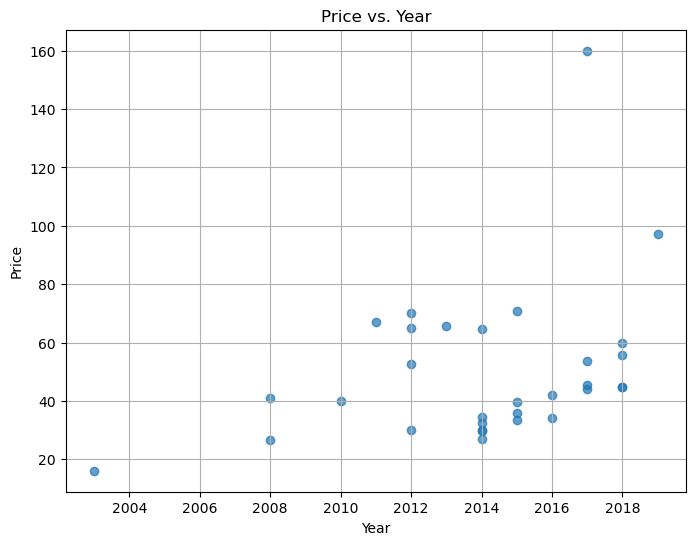

In [27]:
# create up a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(rowsLandRover['Year'], rowsLandRover['Price'], alpha=0.7)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs. Year')

# Show the plot
plt.grid(True)
plt.show()

---
### Your job is to interpret the data and explain the patterns that you see
1. Pick a different car make/model to analyze
2. Perform at least one other type of useful selection
3. You should generate at least two other interesting graphs
4. Explain the patterns you found & make a conjecture about a causal relationship that we are seeing in the data

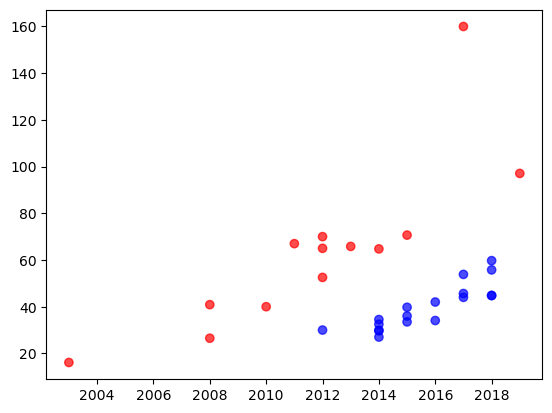

In [30]:
import math
import numpy as np

# Note that the key uses the range rover (as above), rather than picking a different make/model
# ...trying to figure out why we have what looks like at least two lines in the graph

# See what we have in the data
#print( rowsLandRover['Name'].unique() )

# Make/Model
rowsLandRover = data[ data['Name'].str.contains("Land Rover Range Rover") ]
rowsLandRover = pd.DataFrame(rowsLandRover) # create a copy (avoid a warning we get down below)

# Clean 'Power' to be just numbers
for idx, row in rowsLandRover.iterrows():
    if isinstance(row['Power'], str) and row['Power'].endswith(" bhp"):
        rowsLandRover.at[idx, 'Power'] = row['Power'][:-4]
# Convert 'Power' column to numeric, handling errors
rowsLandRover['Power'] = pd.to_numeric(rowsLandRover['Power'], errors='coerce')

# Filter method (based on a few different hings)
#rowsLandRover = rowsLandRover[ rowsLandRover['Seats'] == 5 ]
#rowsLandRover = rowsLandRover[ rowsLandRover['Year'] < 2015 ]
#rowsLandRover = rowsLandRover[ ~rowsLandRover['Name'].str.contains("Sport") ]
#rowsLandRover = rowsLandRover[ (rowsLandRover['Power'] < 200) & (rowsLandRover['Power'].notnull()) ]

# color based on a condition
rowsLandRover['Color'] = np.where(rowsLandRover['Power'] < 200, 'blue', 'red')

# ScatterPlot
plt.scatter(rowsLandRover['Year'], rowsLandRover['Price'], alpha=0.7, c=rowsLandRover['Color'])
plt.show()